In [18]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
data = pd.read_csv('SolarPrediction.csv')

In [ ]:
# Preprocessing function
def preprocess_data(df):
    df = df.copy()
    df.drop(columns=['Data'], inplace=True)

    # Convert time columns
    df['Time'] = pd.to_datetime(df['Time'])
    df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'])
    df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'])

    # Extract time features
    df['Time_Hour'] = df['Time'].dt.hour
    df['Time_Minute'] = df['Time'].dt.minute
    df['Time_Second'] = df['Time'].dt.second

    df['SunriseHour'] = df['TimeSunRise'].dt.hour
    df['SunriseMinute'] = df['TimeSunRise'].dt.minute

    df['SunsetHour'] = df['TimeSunSet'].dt.hour
    df['SunsetMinute'] = df['TimeSunSet'].dt.minute

    # Calculate day length and time since sunrise
    df['DayLength'] = ((df['SunsetHour'] * 60 + df['SunsetMinute']) -
                      (df['SunriseHour'] * 60 + df['SunriseMinute']))

    df['MinutesSinceSunrise'] = ((df['Time_Hour'] * 60 + df['Time_Minute']) -
                                (df['SunriseHour'] * 60 + df['SunriseMinute']))

    df.drop(['Time', 'TimeSunRise', 'TimeSunSet'], axis=1, inplace=True)
    return df

# Apply preprocessing
data = preprocess_data(data)

<ipython-input-3-28747256be62>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
<ipython-input-3-28747256be62>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'])
<ipython-input-3-28747256be62>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'])


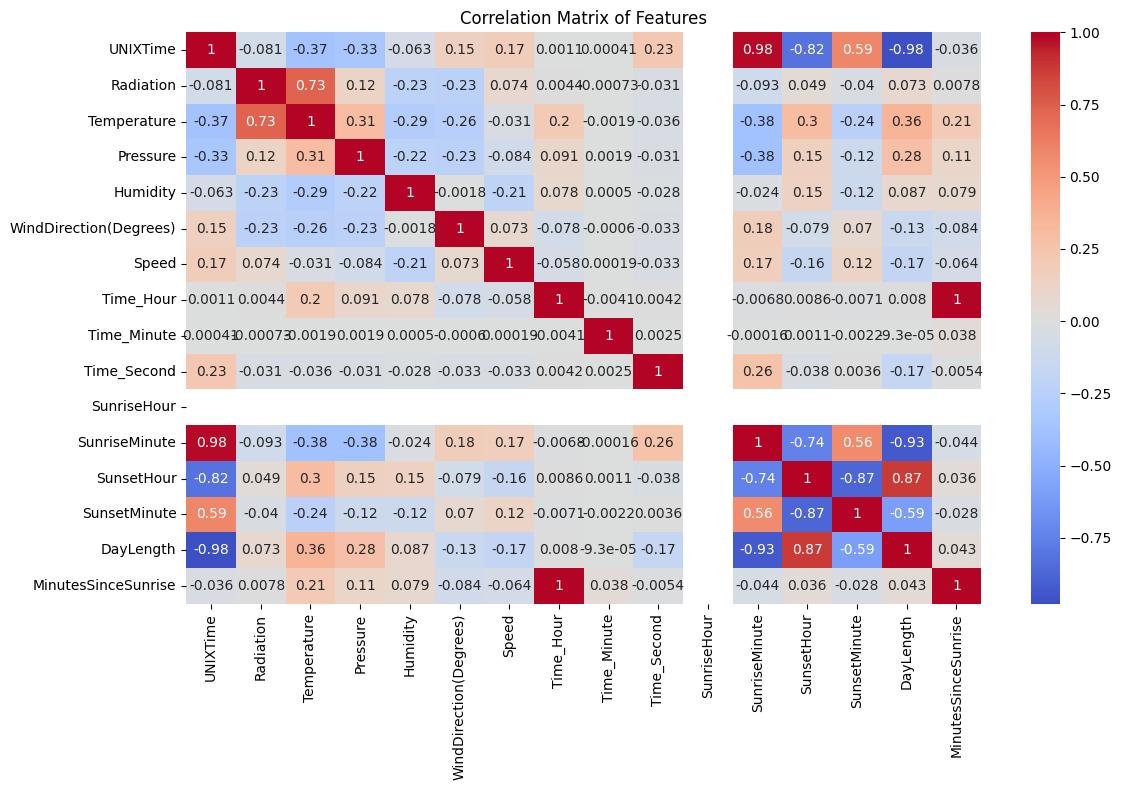

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [ ]:
# Split features and target
X = data.drop('Radiation', axis=1)
y = data['Radiation']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

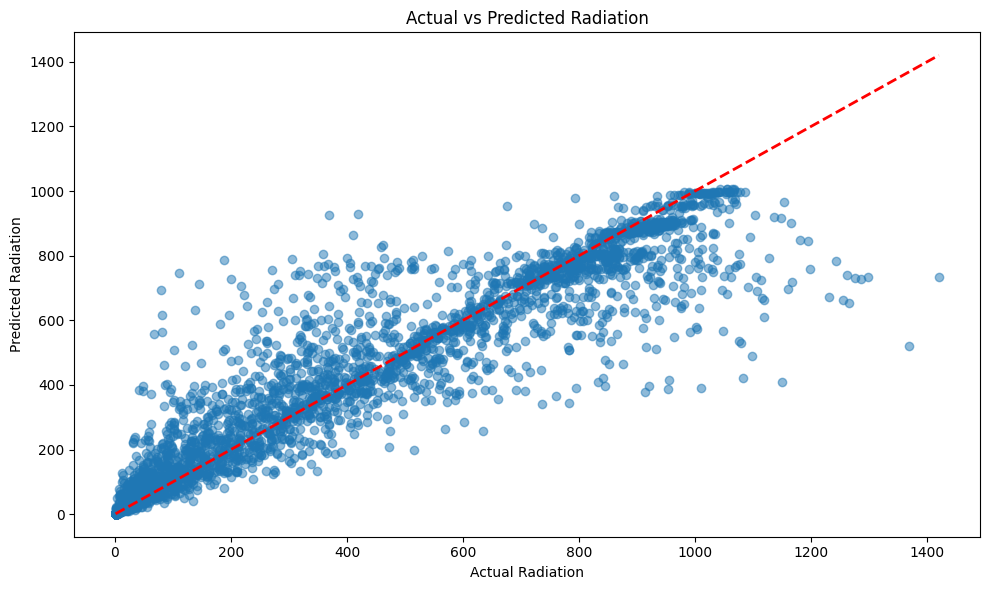

In [ ]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Radiation')
plt.ylabel('Predicted Radiation')
plt.title('Actual vs Predicted Radiation')
plt.tight_layout()
plt.show()


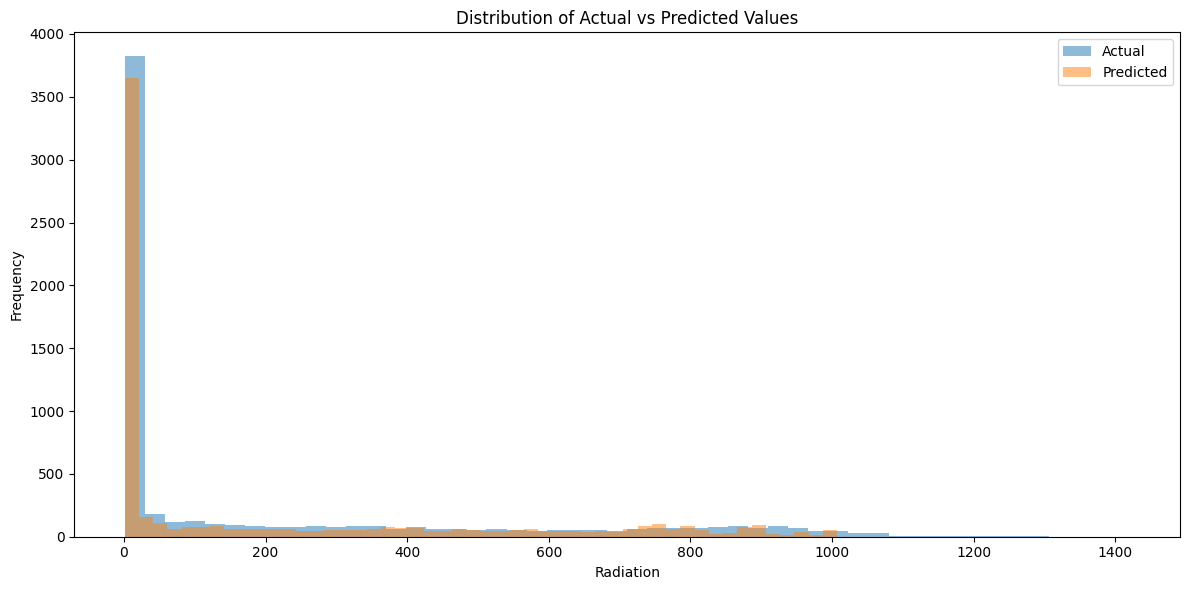

In [ ]:
# Distribution of predictions vs actual
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=50, alpha=0.5, label='Actual')
plt.hist(y_pred, bins=50, alpha=0.5, label='Predicted')
plt.xlabel('Radiation')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

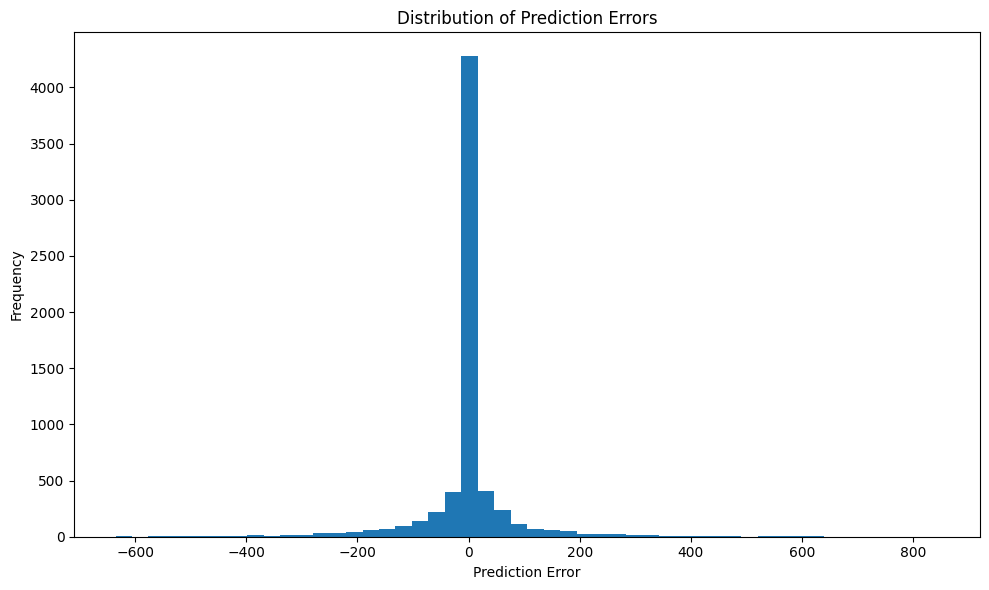

In [ ]:
# Error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()


In [ ]:
# Print metrics
print('\nModel Performance Metrics:')
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')


Model Performance Metrics:
R2 Score: 0.9214
MAE: 37.0729
RMSE: 88.3549


In [17]:
#cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'\nCross-validation scores: {cv_scores}')
print(f'Average CV score: {cv_scores.mean():.4f}')
print(f'CV score std: {cv_scores.std():.4f}')


Cross-validation scores: [0.91586926 0.92492811 0.92298779 0.91843832 0.92923147]
Average CV score: 0.9223
CV score std: 0.0047


In [ ]:
import joblib

# Simpan model dengan joblib (lebih stabil untuk cross-version compatibility)
joblib.dump(model, 'model_solar.joblib', compress=3)

['model_solar.joblib']